In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pandas import Series

%matplotlib inline

# Ejemplo de regresion lineal para el barrio del abasto

La siguiente es una prueba de regrsion lineal sobre el barrio de abasto.
el valor objetivo (target) es el precio en dolares por metro cuadrado, 
y se calcula en funcion de los metros cuadrados


In [3]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
properati_filtered= pd.read_csv('../tp1/properati_filtered1.csv',encoding='UTF-8')
capitalFederal = properati_filtered.loc[properati_filtered.state_name.str.contains("Capital Federal", na=False),:]
Abasto =  capitalFederal.loc[capitalFederal.place_name.str.contains("Abasto", na=False),:]
Abasto.tail()

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
33024,Argentina,2017-06-08,USD,AMPLIO MONOAMBIENTE DIVISIBLE DE 46M2 - COCINA...,NaN,NaN,NaN,NaN,e719722661730432e94f000ea452758bec621a4c,https://thumbs4.properati.com/4/T5ttreG1sX5fVm...,...,2163.043478,2163.043478,http://www.properati.com.ar/18zeg_venta_depart...,apartment,1.0,Capital Federal,46.0,NaN,46.0,Departamento de 1 ambiente en Venta en Abasto
33039,Argentina,2017-06-08,USD,OPORTUNIDAD PARA APROVECHAR POR SU CALIDAD Y E...,NaN,NaN,NaN,NaN,4a2fe5ca2ab1988fd6736b181934756ace939b91,https://thumbs4.properati.com/3/i_FVUFbSLmND1o...,...,2716.666667,2716.666667,http://www.properati.com.ar/18zfk_venta_depart...,apartment,3.0,Capital Federal,60.0,NaN,60.0,gallo 500 / Excelente 3 Ambientes Reciclado Ba...
33040,Argentina,2017-06-08,USD,OPORTUNIDAD PARA APROVECHAR POR SU CALIDAD Y E...,NaN,NaN,NaN,NaN,21d40feb82ae08f326947446d512eb93dd92cb68,https://thumbs4.properati.com/4/OVMueu2qfWvWps...,...,2716.666667,2716.666667,http://www.properati.com.ar/18zfm_venta_depart...,apartment,3.0,Capital Federal,60.0,NaN,60.0,gallo 500 Excelente 3 Ambientes Reciclado Baño...
33820,Argentina,2017-06-13,USD,OPORTUNIDAD PARA APROVECHAR POR SU CALIDAD Y E...,NaN,NaN,NaN,NaN,c5255882af32dc7b0b99afd1804ceae7ab954052,https://thumbs4.properati.com/8/cafnmEv-nnFhT0...,...,2716.666667,2716.666667,http://www.properati.com.ar/1961r_venta_depart...,apartment,3.0,Capital Federal,60.0,NaN,60.0,gallo 500 / Excelente 3 Ambientes Reciclado Ba...
33923,Argentina,2017-06-14,USD,Excelente local a Estrenar entre Almagro y Vil...,4500.0,NaN,NaN,NaN,1be773e3396f43cc6c878b8742f6b448133e7a10,https://thumbs4.properati.com/3/hYv2XaHazPzl_I...,...,2840.909091,2840.909091,http://www.properati.com.ar/196ib_venta_local_...,store,1.0,Capital Federal,44.0,NaN,44.0,Local en Alquiler Abasto


In [5]:
Abasto.columns.values

array([u'country_name', u'created_on', u'currency', u'description',
       u'expenses', u'extra', u'floor', u'geonames_id', u'id',
       u'image_thumbnail', u'lat', u'lat-lon', u'lon', u'operation',
       u'place_name', u'place_with_parent_names', u'price',
       u'price_aprox_local_currency', u'price_aprox_usd', u'price_per_m2',
       u'price_usd_per_m2', u'properati_url', u'property_type', u'rooms',
       u'state_name', u'surface_covered_in_m2', u'surface_in_m2',
       u'surface_total_in_m2', u'title'], dtype=object)

In [6]:
#quito las filas con valor Nan 
Abasto = Abasto[np.isfinite(Abasto['price_usd_per_m2'])]
Abasto = Abasto[np.isfinite(Abasto['surface_covered_in_m2'])]

In [7]:
#el valor que se quiere predecir es el precio por metro cuadrado 
Abasto_target = Abasto['price_usd_per_m2']

In [8]:
#el valor a partir del cual se lo predice son los metros cuadrados
Abasto_X = Abasto['surface_covered_in_m2'].values[:, np.newaxis]

In [9]:
# divido en training/testing sets
Abasto_X_train = Abasto_X[:-20] #desde el principio hasta 20 antes de que termine
Abasto_X_test = Abasto_X[-20:] #20 antes de que termine hasta el final

In [10]:
# Hago lo mismo con los valores que quiero predecir
Abasto_y_train = Abasto_target[:-20]
Abasto_y_test = Abasto_target[-20:]

In [11]:
#Creo una linear regression
regr = LinearRegression()

In [12]:
# entrenamiento
regr.fit(Abasto_X_train, Abasto_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Hago las predicciones
Abasto_y_pred = regr.predict(Abasto_X_test)
Abasto_y_pred #deberian parecerse a Abasto_y_test

array([ 1995.32227757,  1922.03738178,  1969.53685127,  1991.25089447,
        1998.03653297,  2002.10791607,  1954.60844658,  1954.60844658,
        1991.25089447,  1985.82238367,  2008.89355457,  2008.89355457,
        2017.03632077,  1968.17972357,  1968.17972357,  1987.17951137,
        1968.17972357,  1968.17972357,  1968.17972357,  1989.89376677])

In [20]:
error = Abasto_y_pred-Abasto_y_test 
error.mean()

-284.37507218973235

In [24]:
porcent =(Abasto_y_pred-Abasto_y_test)*100/Abasto_y_test
porcent.mean()

-8.930156572684218

In [47]:
# The coefficients
print 'Coefficients: \n', regr.coef_

Coefficients: 
[-1.3571277]


In [49]:
# el error cuadratico medio
print("Mean squared error: %.2f"
      % mean_squared_error(Abasto_y_test, Abasto_y_pred))

Mean squared error: 255737.99


In [50]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Abasto_y_test, Abasto_y_pred))

Variance score: -0.51


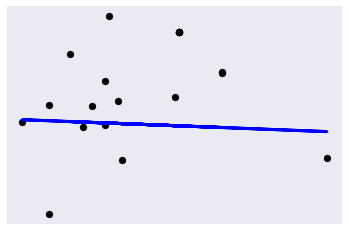

In [51]:
# Plot outputs
plt.scatter(Abasto_X_test, Abasto_y_test,  color='black')
plt.plot(Abasto_X_test, Abasto_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py